In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving medical_students_dataset.csv to medical_students_dataset.csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bank.csv to bank.csv


In [ ]:
import glob
glob.glob("*.csv")


['bank.csv', 'Titanic-Dataset.csv', 'medical_students_dataset.csv']

In [ ]:
bank_df = pd.read_csv("bank.csv")
med_df = pd.read_csv("medical_students_dataset.csv")
titanic_df = pd.read_csv("Titanic-Dataset.csv")

In [ ]:
print("BANK DATASET SHAPE:", bank_df.shape)

bank_df.info()

# (a) object dtype columns
obj_cols = bank_df.select_dtypes(include="object").columns
print("Object columns:", list(obj_cols))

# (b) unique values
for c in obj_cols:
    print(f"Column: {c}")
    print(bank_df[c].unique()[:20])

# (c) null count
print("Null values per column:\n", bank_df.isnull().sum())

# Numeric-only dataset
bank_numeric = bank_df.select_dtypes(exclude="object")
print("Numeric-only shape:", bank_numeric.shape)

# Save numeric-only
bank_numeric.to_csv("banknumericdata.csv", index=False)
print("Saved: banknumericdata.csv")

bank_numeric.describe()


BANK DATASET SHAPE: (45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Object columns: ['job', 'marital', 'education', 'default', 'housing

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
print("MEDICAL DATASET SHAPE:", med_df.shape)
med_df.info()

# Missing values
print("Missing values:", med_df.isnull().sum())

# Imputation
med_filled = med_df.copy()

for col in med_filled.columns:
    if med_filled[col].isnull().sum() > 0:
        if med_filled[col].dtype in ['float64','int64']:
            med_filled[col] = med_filled[col].fillna(med_filled[col].median())
        else:
            med_filled[col] = med_filled[col].fillna(med_filled[col].mode()[0])

print("\nAfter imputation:\n", med_filled.isnull().sum())

# Remove duplicates
dups = med_filled.duplicated().sum()
print("Duplicates:", dups)

med_filled = med_filled.drop_duplicates()
print("Shape after removing duplicates:", med_filled.shape)

# Save cleaned dataset
med_filled.to_csv("medical_student_cleaned.csv", index=False)
print("Saved: medical_student_cleaned.csv")


MEDICAL DATASET SHAPE: (200000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB

Missing values:
 Student ID        20000
Age               20000
Gender            20000
Height            20

In [ ]:
print("TITANIC SHAPE:", titanic_df.shape)

cols = ["Name","Pclass","Sex","Age","Fare","Survived","Embarked"]
subset = titanic_df[cols]

# Filter Pclass = 1
first_class = subset[subset["Pclass"] == 1]
print("\nFirst class count:", first_class.shape)

# Fare stats
print("Fare Stats for Pclass 1:")
print("Mean:", first_class["Fare"].mean())
print("Median:", first_class["Fare"].median())
print("Min:", first_class["Fare"].min())
print("Max:", first_class["Fare"].max())

# Drop null age
print("Null Age count:", first_class["Age"].isnull().sum())
first_class_clean = first_class.dropna(subset=["Age"])
print("Shape after dropping null Age:", first_class_clean.shape)


TITANIC SHAPE: (891, 12)

First class count: (216, 7)

Fare Stats for Pclass 1:
Mean: 84.1546875
Median: 60.287499999999994
Min: 0.0
Max: 512.3292

Null Age count: 30
Shape after dropping null Age: (186, 7)


In [ ]:
emb = pd.get_dummies(titanic_df["Embarked"], prefix="Embarked")
titanic_enc = pd.concat([titanic_df, emb], axis=1)

# Drop original Embarked
titanic_enc = titanic_enc.drop(columns=["Embarked"])

titanic_enc.to_csv("titanic_with_onehot_embarked.csv", index=False)
print("Saved: titanic_with_onehot_embarked.csv")

titanic_enc.head()


Saved: titanic_with_onehot_embarked.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True



Survival rate by sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


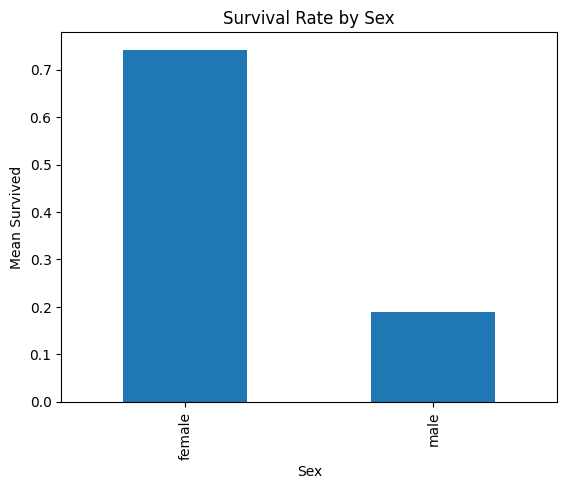

In [ ]:
import matplotlib.pyplot as plt

surv_by_sex = titanic_df.groupby("Sex")["Survived"].mean()
print("Survival rate by sex:", surv_by_sex)

surv_by_sex.plot(kind="bar")
plt.title("Survival Rate by Sex")
plt.ylabel("Mean Survived")
plt.show()



Survival rate by Embarked:
 Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


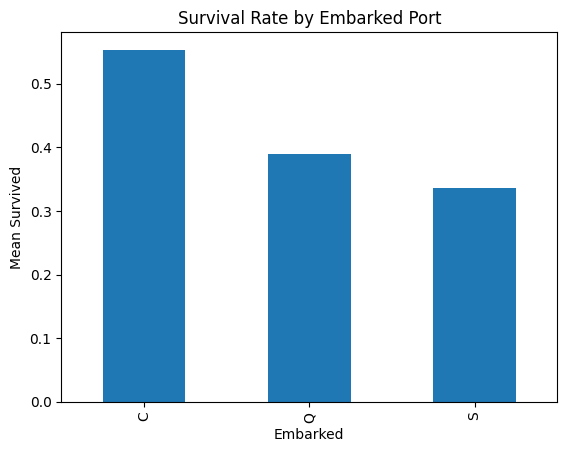

In [ ]:
surv_by_emb = titanic_df.groupby("Embarked")["Survived"].mean()
print("Survival rate by Embarked:", surv_by_emb)

surv_by_emb.plot(kind="bar")
plt.title("Survival Rate by Embarked Port")
plt.ylabel("Mean Survived")
plt.show()


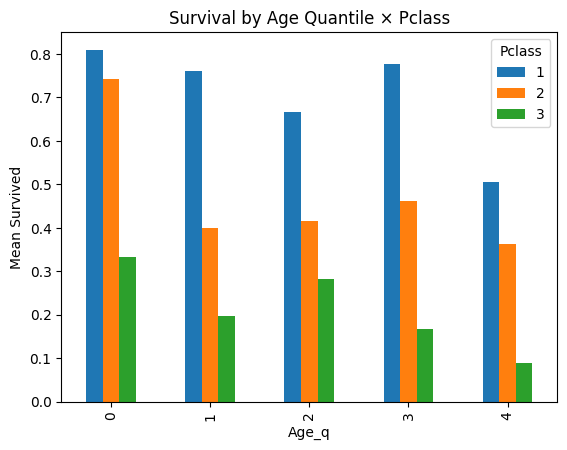

In [ ]:
age_df = titanic_df.dropna(subset=["Age"]).copy()

age_df["Age_q"] = pd.qcut(age_df["Age"], 5, labels=False)

pivot = age_df.pivot_table(
    index="Age_q",
    columns="Pclass",
    values="Survived",
    aggfunc="mean"
)

pivot
pivot.plot(kind="bar")
plt.title("Survival by Age Quantile × Pclass")
plt.ylabel("Mean Survived")
plt.show()
